# imports 

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from prophet import Prophet

# Assignment 1: Rolling Average

1. Plot a line chart of the raw PowerConsumption_Zone1 series. This represents electricity consumption in KwH.
2. Then, calculate a 1 week (7 * 24) period moving average and plot.
3. Finally, calculate a 30-day (30 * 24) period moving average and plot.
4. Are there any unusual or unexpected patterns in the data?

In [2]:
electricity_df = pd.read_csv(
    "data/powerconsumption.csv",
    usecols=["PowerConsumption_Zone1", "Datetime"],
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean()

electricity_df.head()

,PowerConsumption_Zone1
Datetime,
2017-01-01 00:00:00,29197.974683
2017-01-01 01:00:00,24657.215190
2017-01-01 02:00:00,22083.037973
2017-01-01 03:00:00,20811.139240
2017-01-01 04:00:00,20475.949367


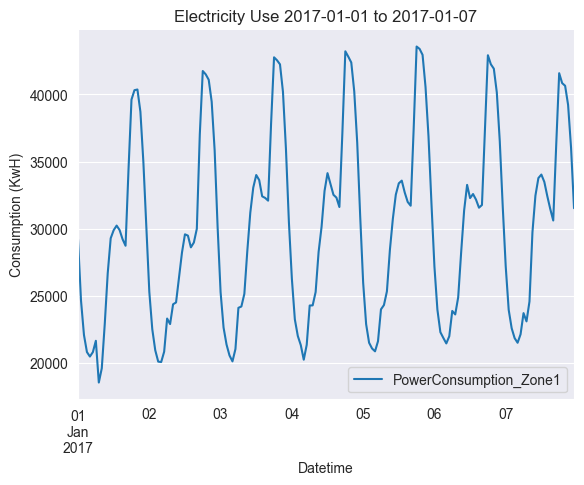

In [3]:
electricity_df[:168].plot(ylabel="Consumption (KwH)", title="Electricity Use 2017-01-01 to 2017-01-07")
sns.despine()

<AxesSubplot:xlabel='Datetime'>

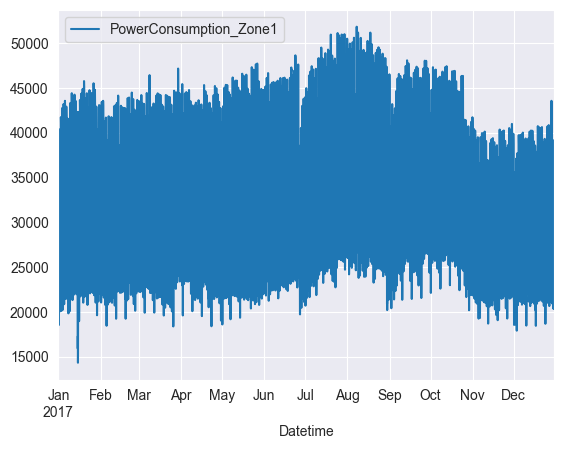

In [4]:
electricity_df.plot()

## weekly rolling avg

<AxesSubplot:xlabel='Datetime'>

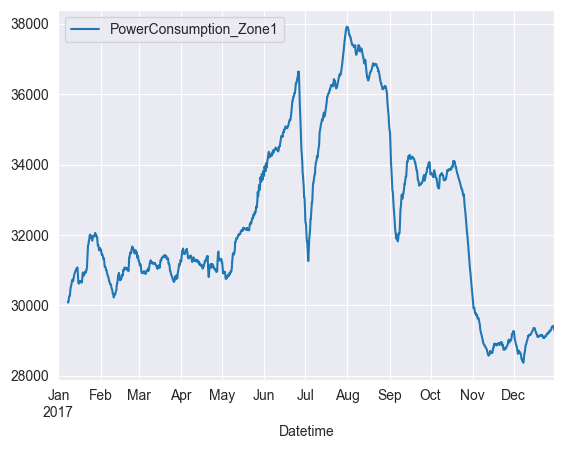

In [6]:
weekly_df = electricity_df.rolling(24 * 7).mean()
weekly_df.plot()

## monthly rolling avg

<AxesSubplot:xlabel='Datetime'>

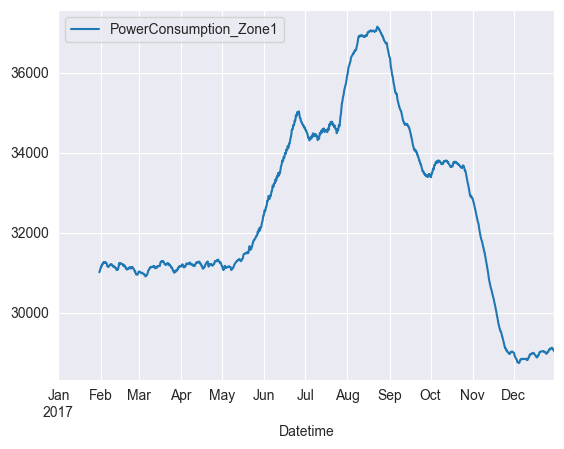

In [7]:
monthly_df = electricity_df.rolling(24 * 30).mean()
monthly_df.plot()

## resample by month

Just get all values by month

[]

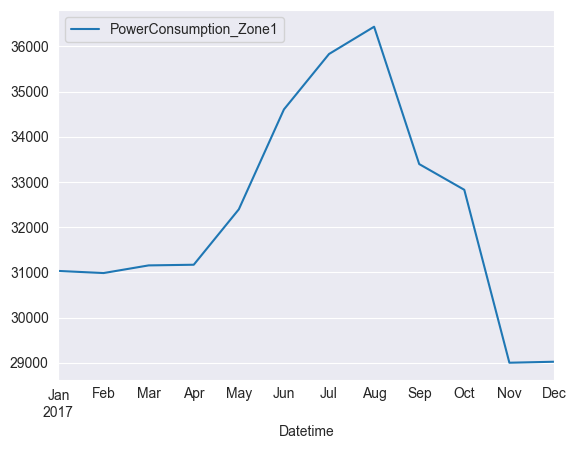

In [8]:
by_month_df = electricity_df.resample("M").mean().plot()
by_month_df.plot()

# decomposition prac

In [4]:
taco_stands_df = pd.read_csv("data/taco_stands.csv", parse_dates=["Date"])
taco_stands_df.head(5)

,Date,Taco Stands in LA
0,2010-01-01,12
1,2010-02-01,15
2,2010-03-01,15
3,2010-04-01,19
4,2010-05-01,24


<AxesSubplot:xlabel='Date'>

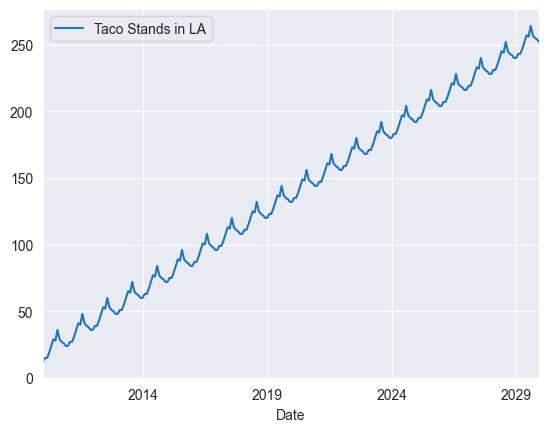

In [5]:
taco_stands_df.set_index('Date').plot()

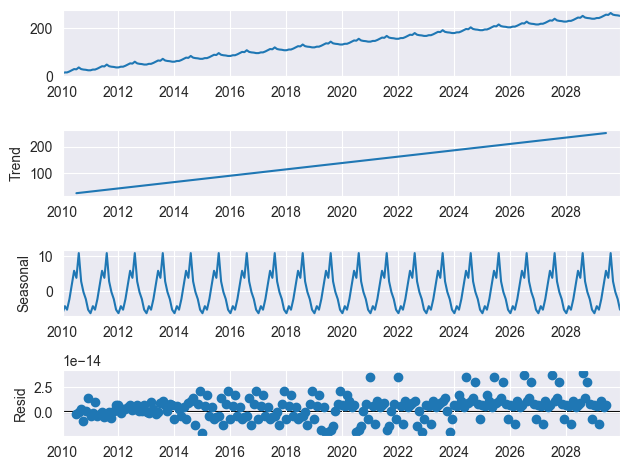

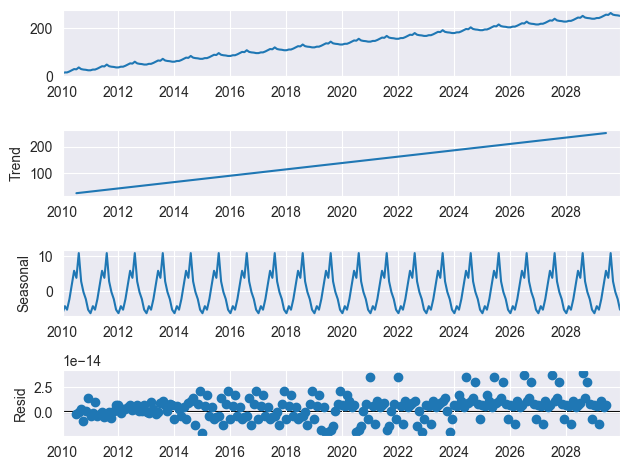

In [7]:
seasonal_decompose(taco_stands_df.set_index('Date')).plot()

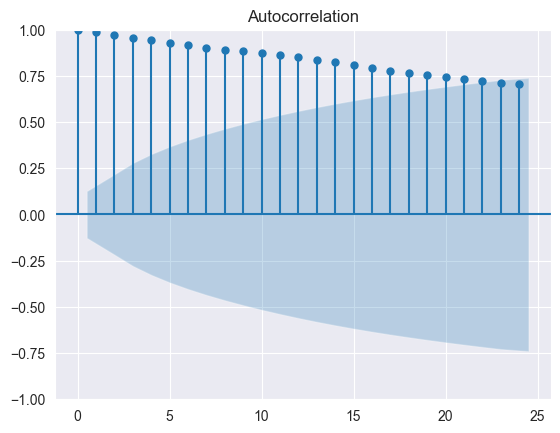

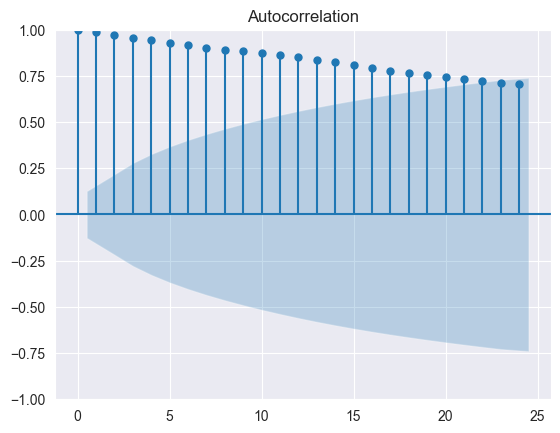

In [14]:
plot_acf(taco_stands_df.set_index('Date'))

In [19]:
taco_stands_diff_df = taco_stands_df.assign(
    differenced=taco_stands_df['Taco Stands in LA'].diff()
).set_index('Date')[1:]

taco_stands_diff_df

,Taco Stands in LA,differenced
Date,,
2010-02-01,15,3.0
2010-03-01,15,0.0
2010-04-01,19,4.0
2010-05-01,24,5.0
2010-06-01,29,5.0
...,...,...
2029-08-01,264,8.0
2029-09-01,257,-7.0
2029-10-01,255,-2.0


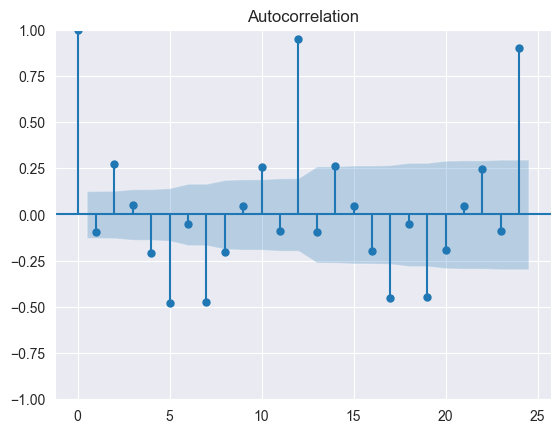

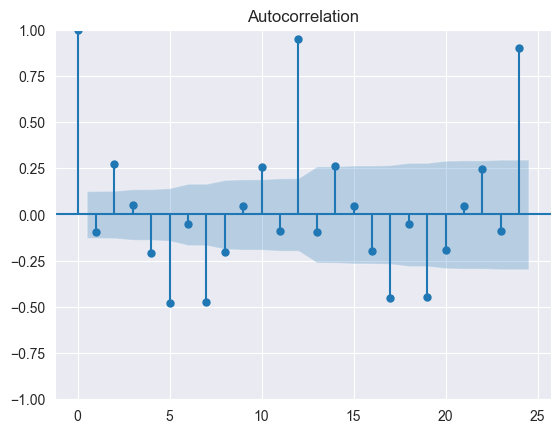

In [20]:
plot_acf(taco_stands_diff_df['differenced'])

# Assignment 2: Decomposition

1. Plot the entire Madrid weather dataset, then try decomposing it. Then, try filtering the data down to the first 168 rows (1 week) and review the results. Fit an ACF chart on the hourly data to assess seasonal correlations.

2. Then, decompose the monthly average temperature series, `monthly_weather`. How does it differ from a daily decomposition? Then, fit an ACF chart on the monthly data to assess seasonal correlations.

## Hourly Dataset Creation

In [12]:
hourly_weather = (
    pd.read_csv(
        "data/madrid_weather.csv",
        usecols=["time", "temperature"],
        parse_dates=["time"],
        index_col="time")
)

hourly_weather.head()

,temperature
time,
2019-01-01 00:59:00,3.1
2019-01-01 01:59:00,2.9
2019-01-01 02:59:00,3.1
2019-01-01 03:59:00,1.9
2019-01-01 04:59:00,0.7


<Axes: xlabel='time'>

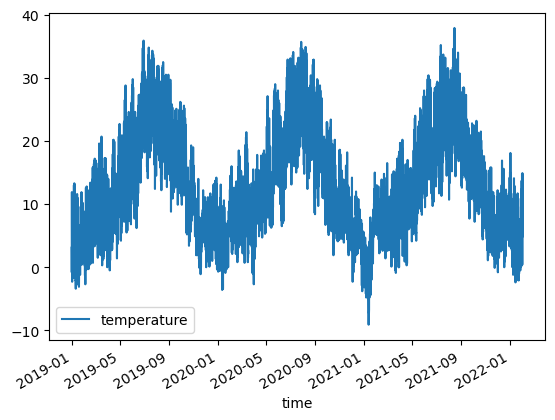

In [4]:
hourly_weather.plot()

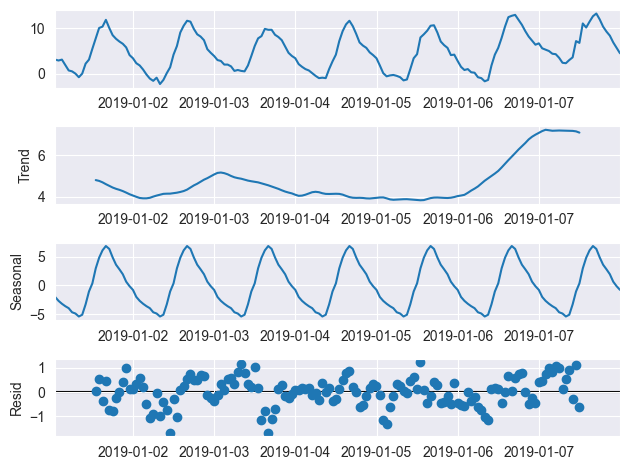

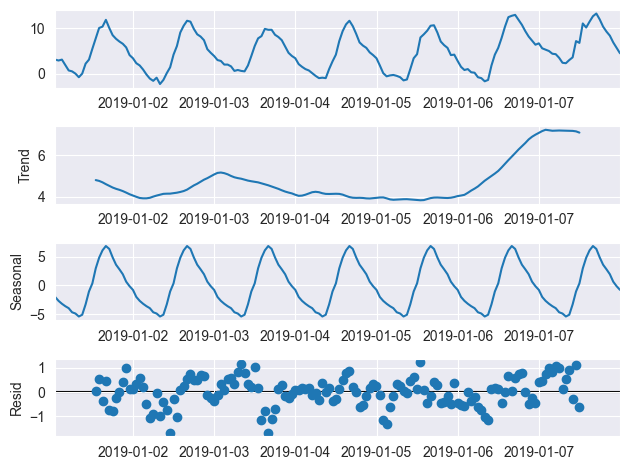

In [21]:
hourly_weather_1week = hourly_weather[:168]
seasonal_decompose(hourly_weather_1week).plot()

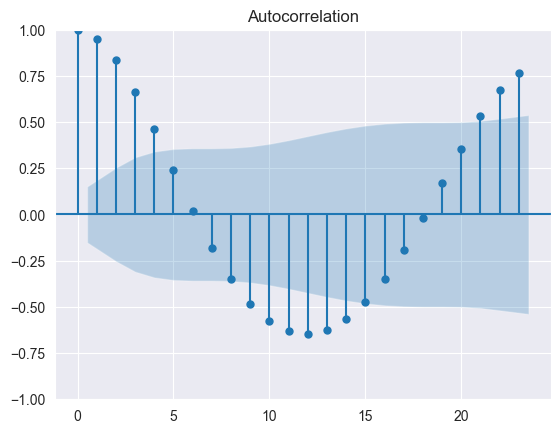

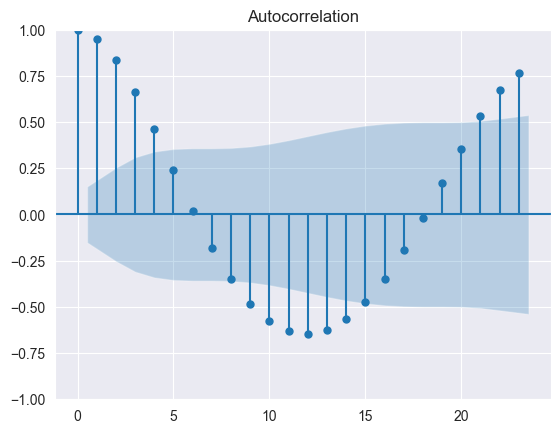

In [22]:
plot_acf(hourly_weather_1week)

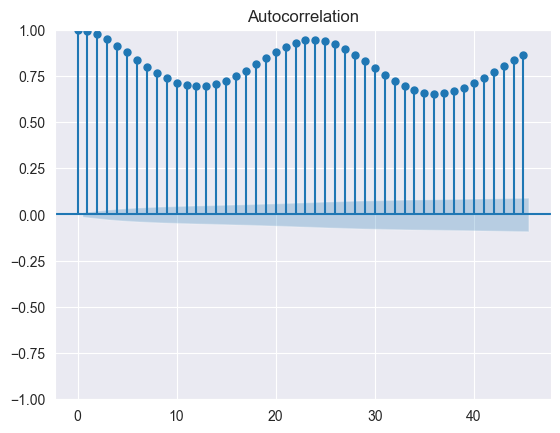

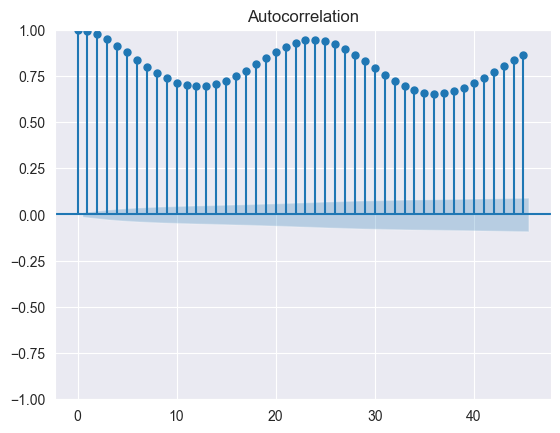

In [23]:
plot_acf(hourly_weather)

## Monthly Dataset Creation

In [24]:
monthly_weather = (
    pd.read_csv(
        "data/madrid_weather.csv",
        usecols=["time", "temperature"],
        parse_dates=["time"],
        index_col="time")
    .resample("M")
    .mean()
)

monthly_weather.head()

,temperature
time,
2019-01-31,4.267473
2019-02-28,6.645982
2019-03-31,9.244489
2019-04-30,9.032222
2019-05-31,15.345968


<AxesSubplot:xlabel='time'>

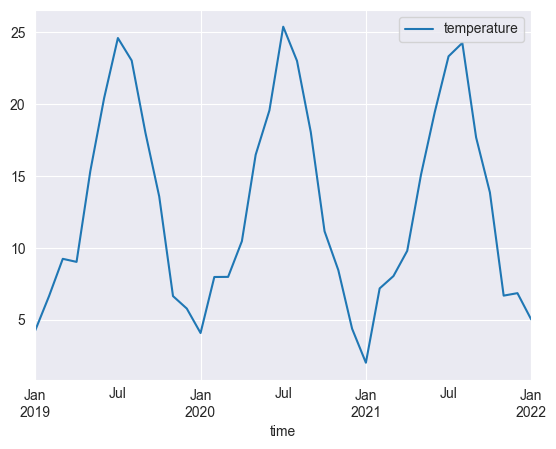

In [25]:
monthly_weather.plot()

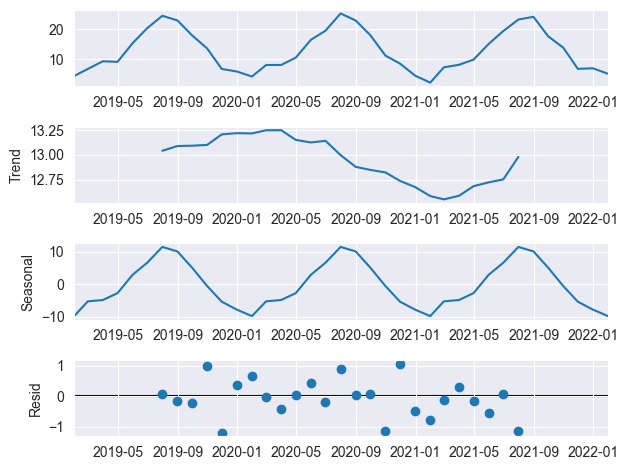

In [27]:
r = seasonal_decompose(monthly_weather)
r.plot();

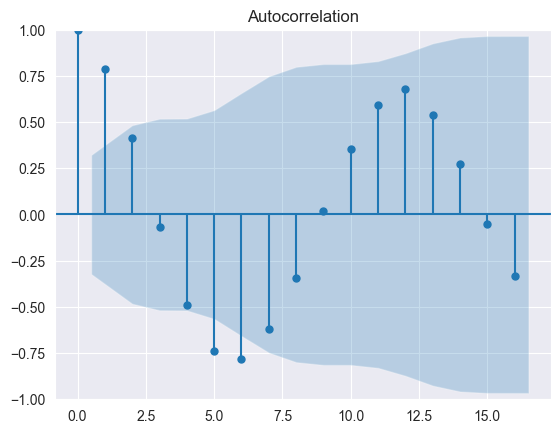

In [29]:
plot_acf(monthly_weather);

# forecast prac

In [16]:
data = {
    'fruit': ['apple', 'banana', 'apple', 'orange', 'banana'],
    'color': ['red', 'yellow', 'green', 'orange', 'yellow']
}
df12 = pd.DataFrame(data)

df12 = pd.get_dummies(df12) 
df12.head()

,fruit_apple,fruit_banana,fruit_orange,color_green,color_orange,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0
4,0,1,0,0,0,0,1


In [27]:
display(air_traffic_df.head())
air_traffic_df.tail()

,Month,Passengers (k),trend,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1949-01-01,112,0,0,0,0,0,0,0,0,0,0,0,0
1,1949-02-01,118,1,0,0,0,1,0,0,0,0,0,0,0
2,1949-03-01,132,2,0,0,0,0,1,0,0,0,0,0,0
3,1949-04-01,129,3,0,0,0,0,0,1,0,0,0,0,0
4,1949-05-01,121,4,0,0,0,0,0,0,1,0,0,0,0


,Month,Passengers (k),trend,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
139,1960-08-01,606,139,0,0,0,0,0,0,0,0,0,1,0
140,1960-09-01,508,140,0,0,0,0,0,0,0,0,0,0,1
141,1960-10-01,461,141,1,0,0,0,0,0,0,0,0,0,0
142,1960-11-01,390,142,0,1,0,0,0,0,0,0,0,0,0
143,1960-12-01,432,143,0,0,1,0,0,0,0,0,0,0,0


# Assignment 3: Forecasting

1. Engineer monthly dummy and trend variables, then fit a regression model and forecast two years worth of airline data (24 months).

2. Review the accuracy - and then try fitting the regression by using a log transform of the target variable.

3. Next, fit a Facebook Prophet model and compare the accuracy of Prophet to your Linear Regression model.

In [25]:
air_traffic = pd.read_csv("data/AirPassengers.csv", parse_dates=["Month"])

air_traffic.head()

,Month,Passengers (k)
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Axes: xlabel='Month'>

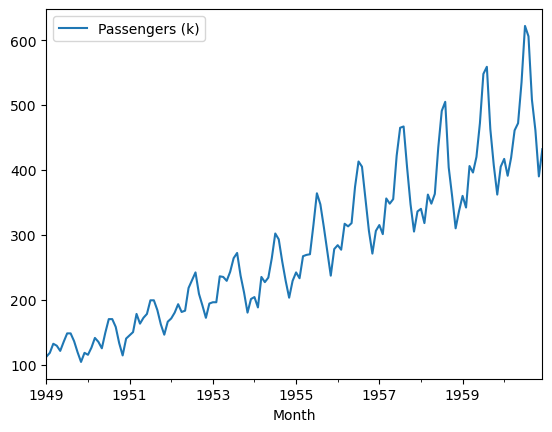

In [12]:
air_traffic.set_index("Month").plot()

### Linear Regression Feature

In [26]:
# Create Features here 
air_traffic_df = air_traffic.assign(
    trend=air_traffic.index,
    month=air_traffic['Month'].dt.month.astype("string"),
)
air_traffic_df = pd.get_dummies(air_traffic_df, drop_first=True, columns=['month'])
air_traffic_df.head()

,Month,Passengers (k),trend,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1949-01-01,112,0,0,0,0,0,0,0,0,0,0,0,0
1,1949-02-01,118,1,0,0,0,1,0,0,0,0,0,0,0
2,1949-03-01,132,2,0,0,0,0,1,0,0,0,0,0,0
3,1949-04-01,129,3,0,0,0,0,0,1,0,0,0,0,0
4,1949-05-01,121,4,0,0,0,0,0,0,1,0,0,0,0


In [28]:
# Data Splitting 
train_air_traffic_df = air_traffic_df.iloc[:-24]
test_air_traffic_df = air_traffic_df.iloc[-24:]

In [31]:
# Model Fitting
y = train_air_traffic_df['Passengers (k)']
y_log = np.log(train_air_traffic_df['Passengers (k)'])
X = sm.add_constant(train_air_traffic_df.iloc[:, 2:])

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Passengers (k)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     181.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           8.20e-65
Time:                        20:35:25   Log-Likelihood:                -527.61
No. Observations:                 119   AIC:                             1081.
Df Residuals:                     106   BIC:                             1117.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.5814      7.511     10.196      0.000      61.691      91.472
trend          2.5152      0.058     43.468      0.000       2.400       2.630
month_10      -1.9364      9.673     -0.200      0.842     -21.114      17.241
month_11     -33.3516      9.676     -3.447      0.001     -52.535     -14.168
month_12      -6.3091      9.928     -0.636      0.526     -25.992      13.373
month_2       -6.2152      9.659     -0.643      0.521     -25.365      12.935
month_3       24.2697      9.659      2.513      0.013       5.119      43.420
month_4       14.8545      9.660      1.538      0.127      -4.298      34.007
month_5       14.5394      9.662      1.505      0.135      -4.616      33.694
month_6       48.3242      9.663      5.001      0.000      29.166      67.482
month_7       77.1090      9.665      7.978      0.000      57.947      96.271
month_8       74.7939      9.667      7.737      0.000      55.628      93.960
month_9       33.2787      9.670      3.442      0.001      14.107      52.450
==============================================================================
Omnibus:                       12.627   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.325
Skew:                           0.783   Prob(JB):                      0.00128
Kurtosis:                       3.483   Cond. No.                         847.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Calculate Forecast Accuracy
y = test_air_traffic_df['Passengers (k)']
X = sm.add_constant(test_air_traffic_df.iloc[:, 2:])
model_predictions = model.predict(X)
mape_metric = mape(y, model_predictions)
mae_metric = mae(y, model_predictions) 
print(f'MAPE: {mape_metric}')
print(f'MAE: {mae_metric}')

MAPE: 0.06765563681778876
MAE: 34.05788113695237


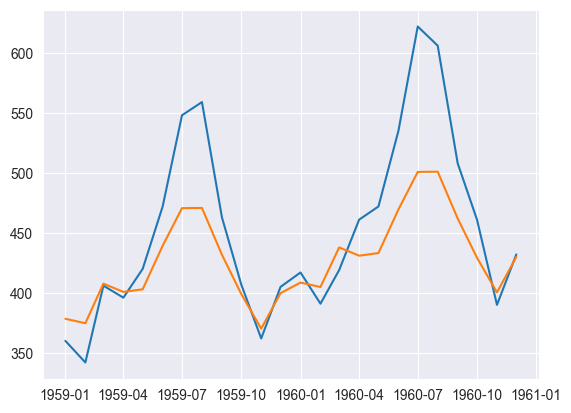

In [35]:
# Plot Performance
fig, ax = plt.subplots()
y = test_air_traffic_df['Passengers (k)']
X = sm.add_constant(test_air_traffic_df.iloc[:, 2:])
months = test_air_traffic_df['Month']

ax.plot(months, y)
ax.plot(months, model.predict(X))

### Facebook Prophet

In [36]:
air_traffic = pd.read_csv("data/AirPassengers.csv", parse_dates=["Month"], usecols=['Month', 'Passengers (k)'])
air_traffic.head()

,Month,Passengers (k)
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [37]:
## Rename Columns
air_traffic.rename({'Month': 'ds', 'Passengers (k)': 'y'}, axis=1, inplace=True)
air_traffic

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [51]:
# split data
train_air_traffic = air_traffic.iloc[:-24]
test_air_traffic = air_traffic.iloc[-24:]

In [41]:
# Fit Prophet Model
model = Prophet(seasonality_mode='multiplicative') 
model.fit(train_air_traffic)

04:09:47 - cmdstanpy - INFO - Chain [1] start processing
04:09:48 - cmdstanpy - INFO - Chain [1] done processing


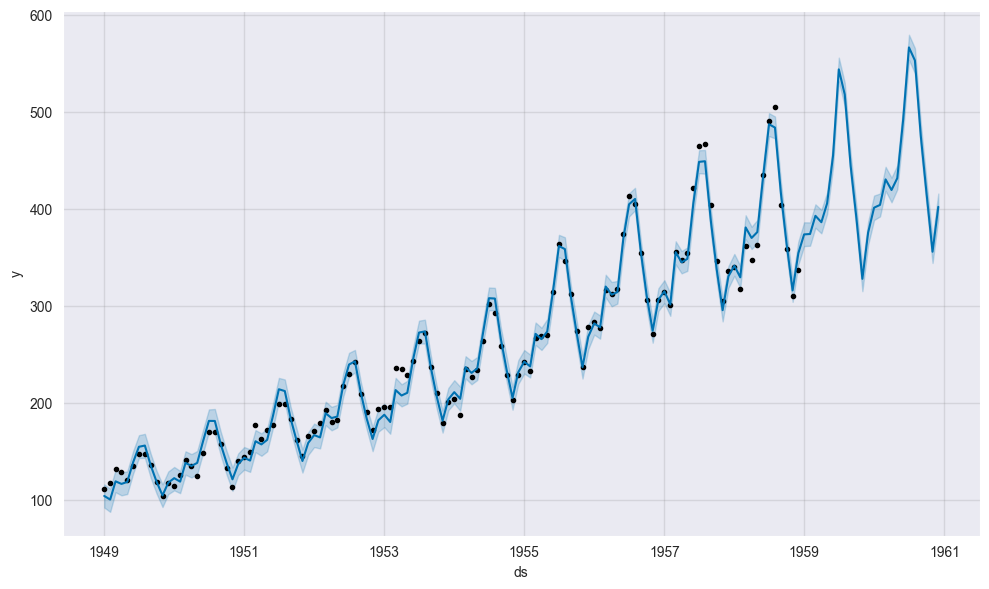

In [43]:
# Build Forecast
a = model.make_future_dataframe(periods=24, freq='M')
b = model.predict(a)
model.plot(b);

In [46]:
future_dates = a
forecast = b 

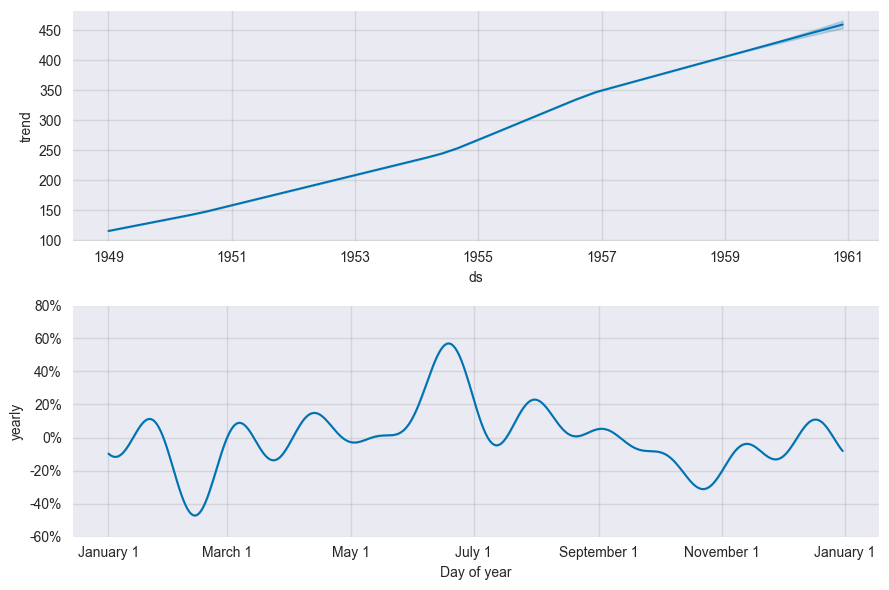

In [48]:
# Decomposition
model.plot_components(forecast);

In [52]:
# Plot Performance
test_air_traffic

,ds,y
120,1959-01-01,360
121,1959-02-01,342
122,1959-03-01,406
123,1959-04-01,396
124,1959-05-01,420
125,1959-06-01,472
126,1959-07-01,548
127,1959-08-01,559
128,1959-09-01,463
129,1959-10-01,407


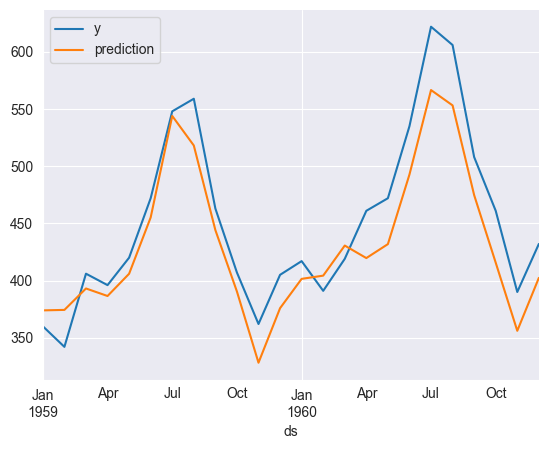

In [53]:
test_air_traffic.assign(prediction=model.predict(future_dates)['yhat']).set_index('ds').plot()
sns.despine(); 

In [57]:
# Calculate Error Metrics
forecast1 = model.predict(future_dates).iloc[-24:, -1]
forecast2 = model.predict(future_dates)

In [58]:
print('MAPE: ', mape(test_air_traffic['y'], forecast1))
print('MAE: ', mae(test_air_traffic['y'], forecast1))

MAPE:  0.05976240749673118
MAE:  27.40147755282472


# forecast prac2

In [64]:
"""
model = Prophet(seasonality)
model.fit(training_data)
future_dates = model.create_future_dataframe(periods, freq)
forecast = model.predict(future_dates)
model.plot(forecast)
model.plot_components(forecast)
"""
df = pd.read_csv('data/AirPassengers.csv', usecols=['Month', 'Passengers (k)'], parse_dates=['Month'])
df.rename({'Month': 'ds', 'Passengers (k)': 'y'}, axis=1, inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


05:43:58 - cmdstanpy - INFO - Chain [1] start processing
05:43:58 - cmdstanpy - INFO - Chain [1] done processing


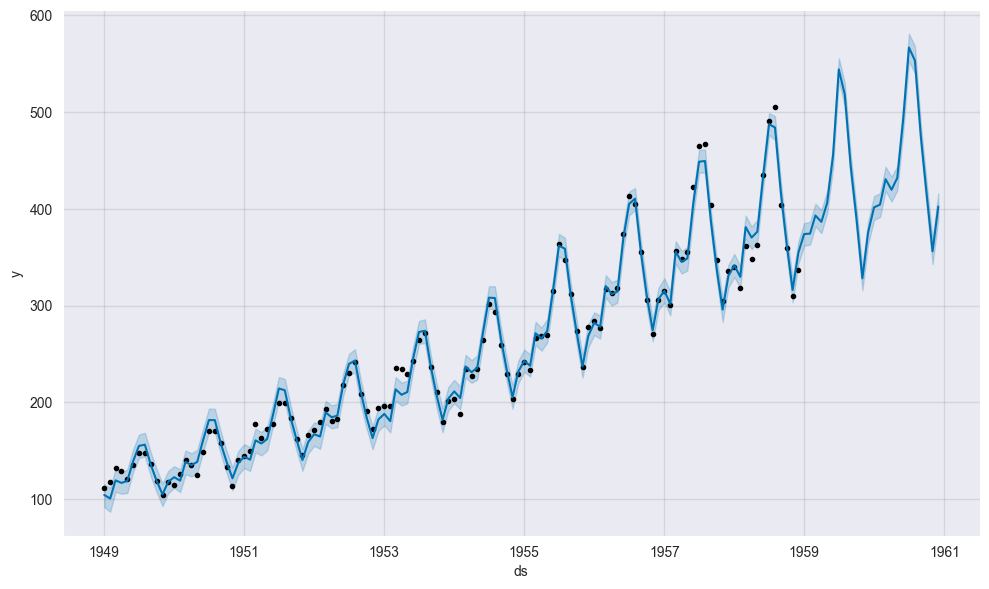

In [70]:
train_df = df[:-24]
test_df = df[-24:]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train_df)
future_days = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(future_days)
m.plot(forecast);

In [75]:
pd.DataFrame({
    'test': test_df['y'], 
    'pred': forecast['yhat'][-24:],
    'diff': forecast['yhat'][-24:] - test_df['y']
}).sort_values(by='diff', ascending=True)

,test,pred,diff
138,622,566.608779,-55.391221
139,606,553.193644,-52.806356
141,461,415.614020,-45.385980
137,535,492.724012,-42.275988
135,461,419.662926,-41.337074
127,559,518.128793,-40.871207
136,472,431.864008,-40.135992
142,390,356.056344,-33.943656
130,362,328.133202,-33.866798
140,508,474.732581,-33.267419


## ylim

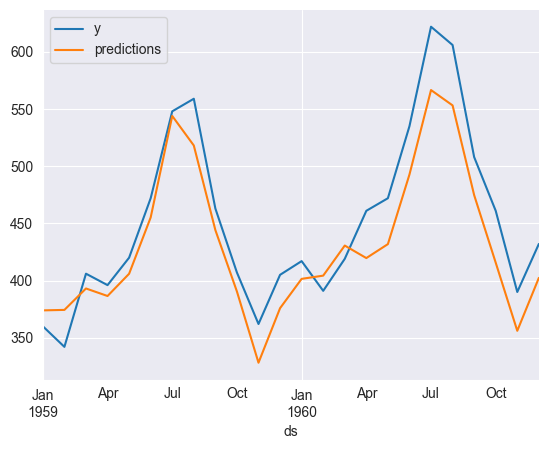

In [76]:
test_df.assign(predictions=forecast['yhat']).set_index('ds').plot()
sns.despine(); 

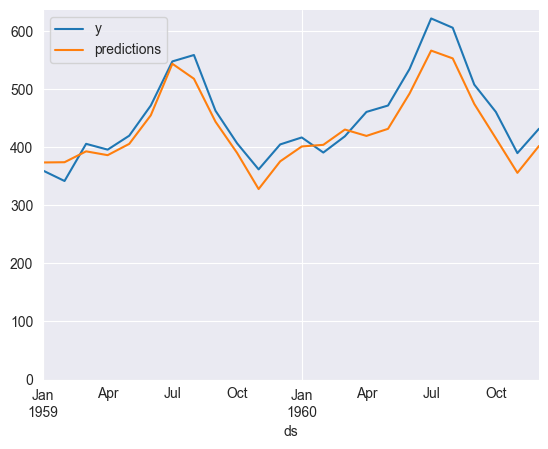

In [77]:
test_df.assign(predictions=forecast['yhat']).set_index('ds').plot(ylim=0)
sns.despine();